In [36]:
# Importing requited packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

#### Here, I will be working with the 'MPG_Car_Data.csv' file. Firstly, I will go through a Simple Linear Regression model, by using the mpg column as output and the horsepower(hp) column as input and make a model out of it

In [10]:
# Reading the 'MPG_Car_Data.csv' file

data = pd.read_csv('/content/drive/MyDrive/Datasets/MPG_Car_Data.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [12]:
# Creating another data set for the mpg and horsepower(hp) column only

slrm_data = data[['mpg','horsepower']]
slrm_data.dtypes

,0
mpg,float64
horsepower,int64


In [13]:
# Check statistical summary of numerical columns

slrm_data.describe()

,mpg,horsepower
count,392.000000,392.000000
mean,23.445918,104.469388
std,7.805007,38.491160
min,9.000000,46.000000
25%,17.000000,75.000000
50%,22.750000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


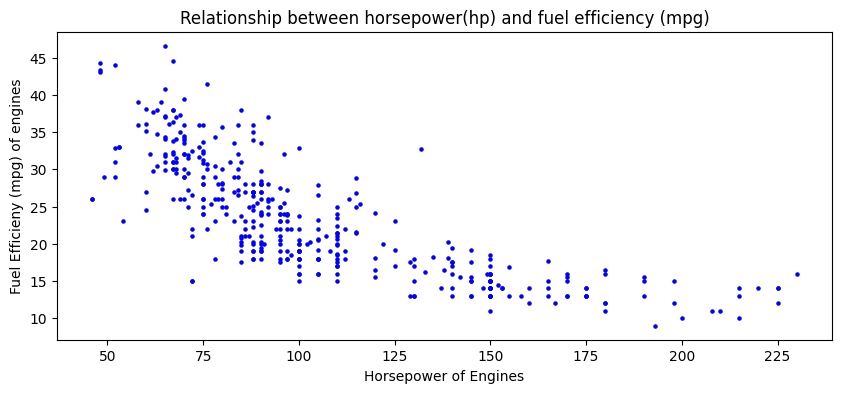

In [25]:
# Check the scatter plot between output (mpg) in y axis and input(horsepower) in x axis

plt.figure(figsize = (10,4))
plt.scatter(slrm_data['horsepower'], slrm_data['mpg'], color = 'blue', marker = 'o', s = 5)
plt.xlabel('Horsepower of Engines')
plt.ylabel('Fuel Efficieny (mpg) of engines')
plt.title('Relationship between horsepower(hp) and fuel efficiency (mpg)')
plt.show()

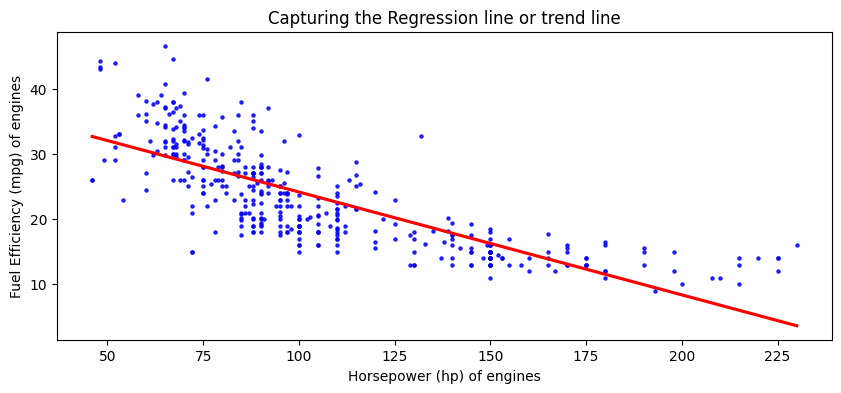

In [28]:
# Get the regression line in case of the above scatter plot
# Input is horsepower and output is fuel efficieny (mpg)

plt.figure(figsize = (10,4))
sns.regplot(x = 'horsepower', y = 'mpg', data = slrm_data, scatter_kws = {'color':'blue', 's': 5}, line_kws = {'color': 'red'}, ci = None)
plt.xlabel('Horsepower (hp) of engines')
plt.ylabel('Fuel Efficiency (mpg) of engines')
plt.title('Capturing the Regression line or trend line')
plt.show()

In [31]:
# Now, building the SLRM model

slrm_model = LinearRegression()
slrm_model.fit(slrm_data[['horsepower']], slrm_data.mpg)

LinearRegression()

In [37]:
# The model is build, now we can predict the fuel efficieny (mpg) by specifying the horsepower

slrm_model.predict([[129]])

array([19.57389042])

In [41]:
# How the above calculations are done
# This is done by using the slope and intercept value
# We know, Y = m*x+c; where, m is slope and c is intercept

# Slope and Intercept of the slrm_model

slope = slrm_model.coef_
print('Slope of the model is:', slope)
intercept = slrm_model.intercept_
print('Intercept of the model is:', intercept)

# How for 129 horse power, we have 19.57389042 mpg?

mpg_129hp = slope * 129 + intercept
print('mpg for 129 hp is:', mpg_129hp)

Slope of the model is: [-0.15784473]
Intercept of the model is: 39.93586102117047
mpg for 129 hp is: [19.57389042]


In [43]:
# Applying the slrm_model to a pre build data frame that contains information of horsepowers

d = pd.DataFrame({'horsepower':[141,124,138,101,99,100,58,97,133]})

# Applying the slrm_model onto the d data frame and storing the results as y

y = slrm_model.predict(d)

# Creating a new column 'mpg' that is build my applying the slrm_model

d['mpg'] = y

d

,horsepower,mpg
0,141,17.679754
1,124,20.363114
2,138,18.153288
3,101,23.993543
4,99,24.309232
5,100,24.151388
6,58,30.780866
7,97,24.624922
8,133,18.942511
